In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'AviationCleaned.csv'
df = pd.read_csv(file_path)

In [32]:
df.head()

Flight Number Scheduled Departure Time Actual Departure Time  \
0         FL885      2024-05-20 11:51:21   2024-07-10 02:38:54   
1         FL930      2024-01-23 06:56:23   2024-07-07 02:53:44   
2         FL478      2024-05-30 09:18:39   2024-12-05 01:00:54   
3         FL637      2024-08-15 05:21:47   2024-09-21 13:23:42   
4         FL318      2024-07-25 15:29:58   2024-03-21 15:05:54   

   Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0               50                             12.36   
1               27                             14.53   
2              108                             10.73   
3               64                             15.10   
4               30                             13.46   

   Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                        115            79.18                   96.24   
1                         83            98.59                   80.49   
2                         87            67.44                   97.90   
3                         99            69.01                   80.17   
4                        114            50.36                   82.23   

   Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                          9.21                   4.15       10953.75   
1                          1.55                   3.93       31597.25   
2                          2.06                   4.26       13700.27   
3                          6.85                   4.13       39913.01   
4                          7.30                   4.97       11531.48   

   Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
0              27847.59                  17.90                  1058.68   
1               1564.41                   7.70                  2941.32   
2              30494.88                   5.84                  1920.45   
3              13444.09                  24.09                  3167.79   
4              34668.98                   7.18                   619.80   

   Debt-to-Equity Ratio  Revenue per ASK  Cost per ASK  Profit (USD)  
0                  2.46          2639.46       6710.26     -16893.84  
1                  2.89          8040.01        791.89      30032.84  
2                  1.34          3216.03       7158.42     -16794.61  
3                  0.60          9664.17       3255.23      26468.92  
4                  0.84          2320.22       6975.65     -23137.50

In [6]:
sns.set(style='whitegrid', palette='muted')

In [42]:
relevant_columns = [
    'Revenue (USD)', 'Operating Cost (USD)', 'Load Factor (%)',
    'Net Profit Margin (%)', 'Debt-to-Equity Ratio', 'Ancillary Revenue (USD)',
    'Aircraft Utilization (Hours/Day)', 'Fleet Availability (%)', 'Fuel Efficiency (ASK)',
    'Revenue per ASK', 'Cost per ASK'
]

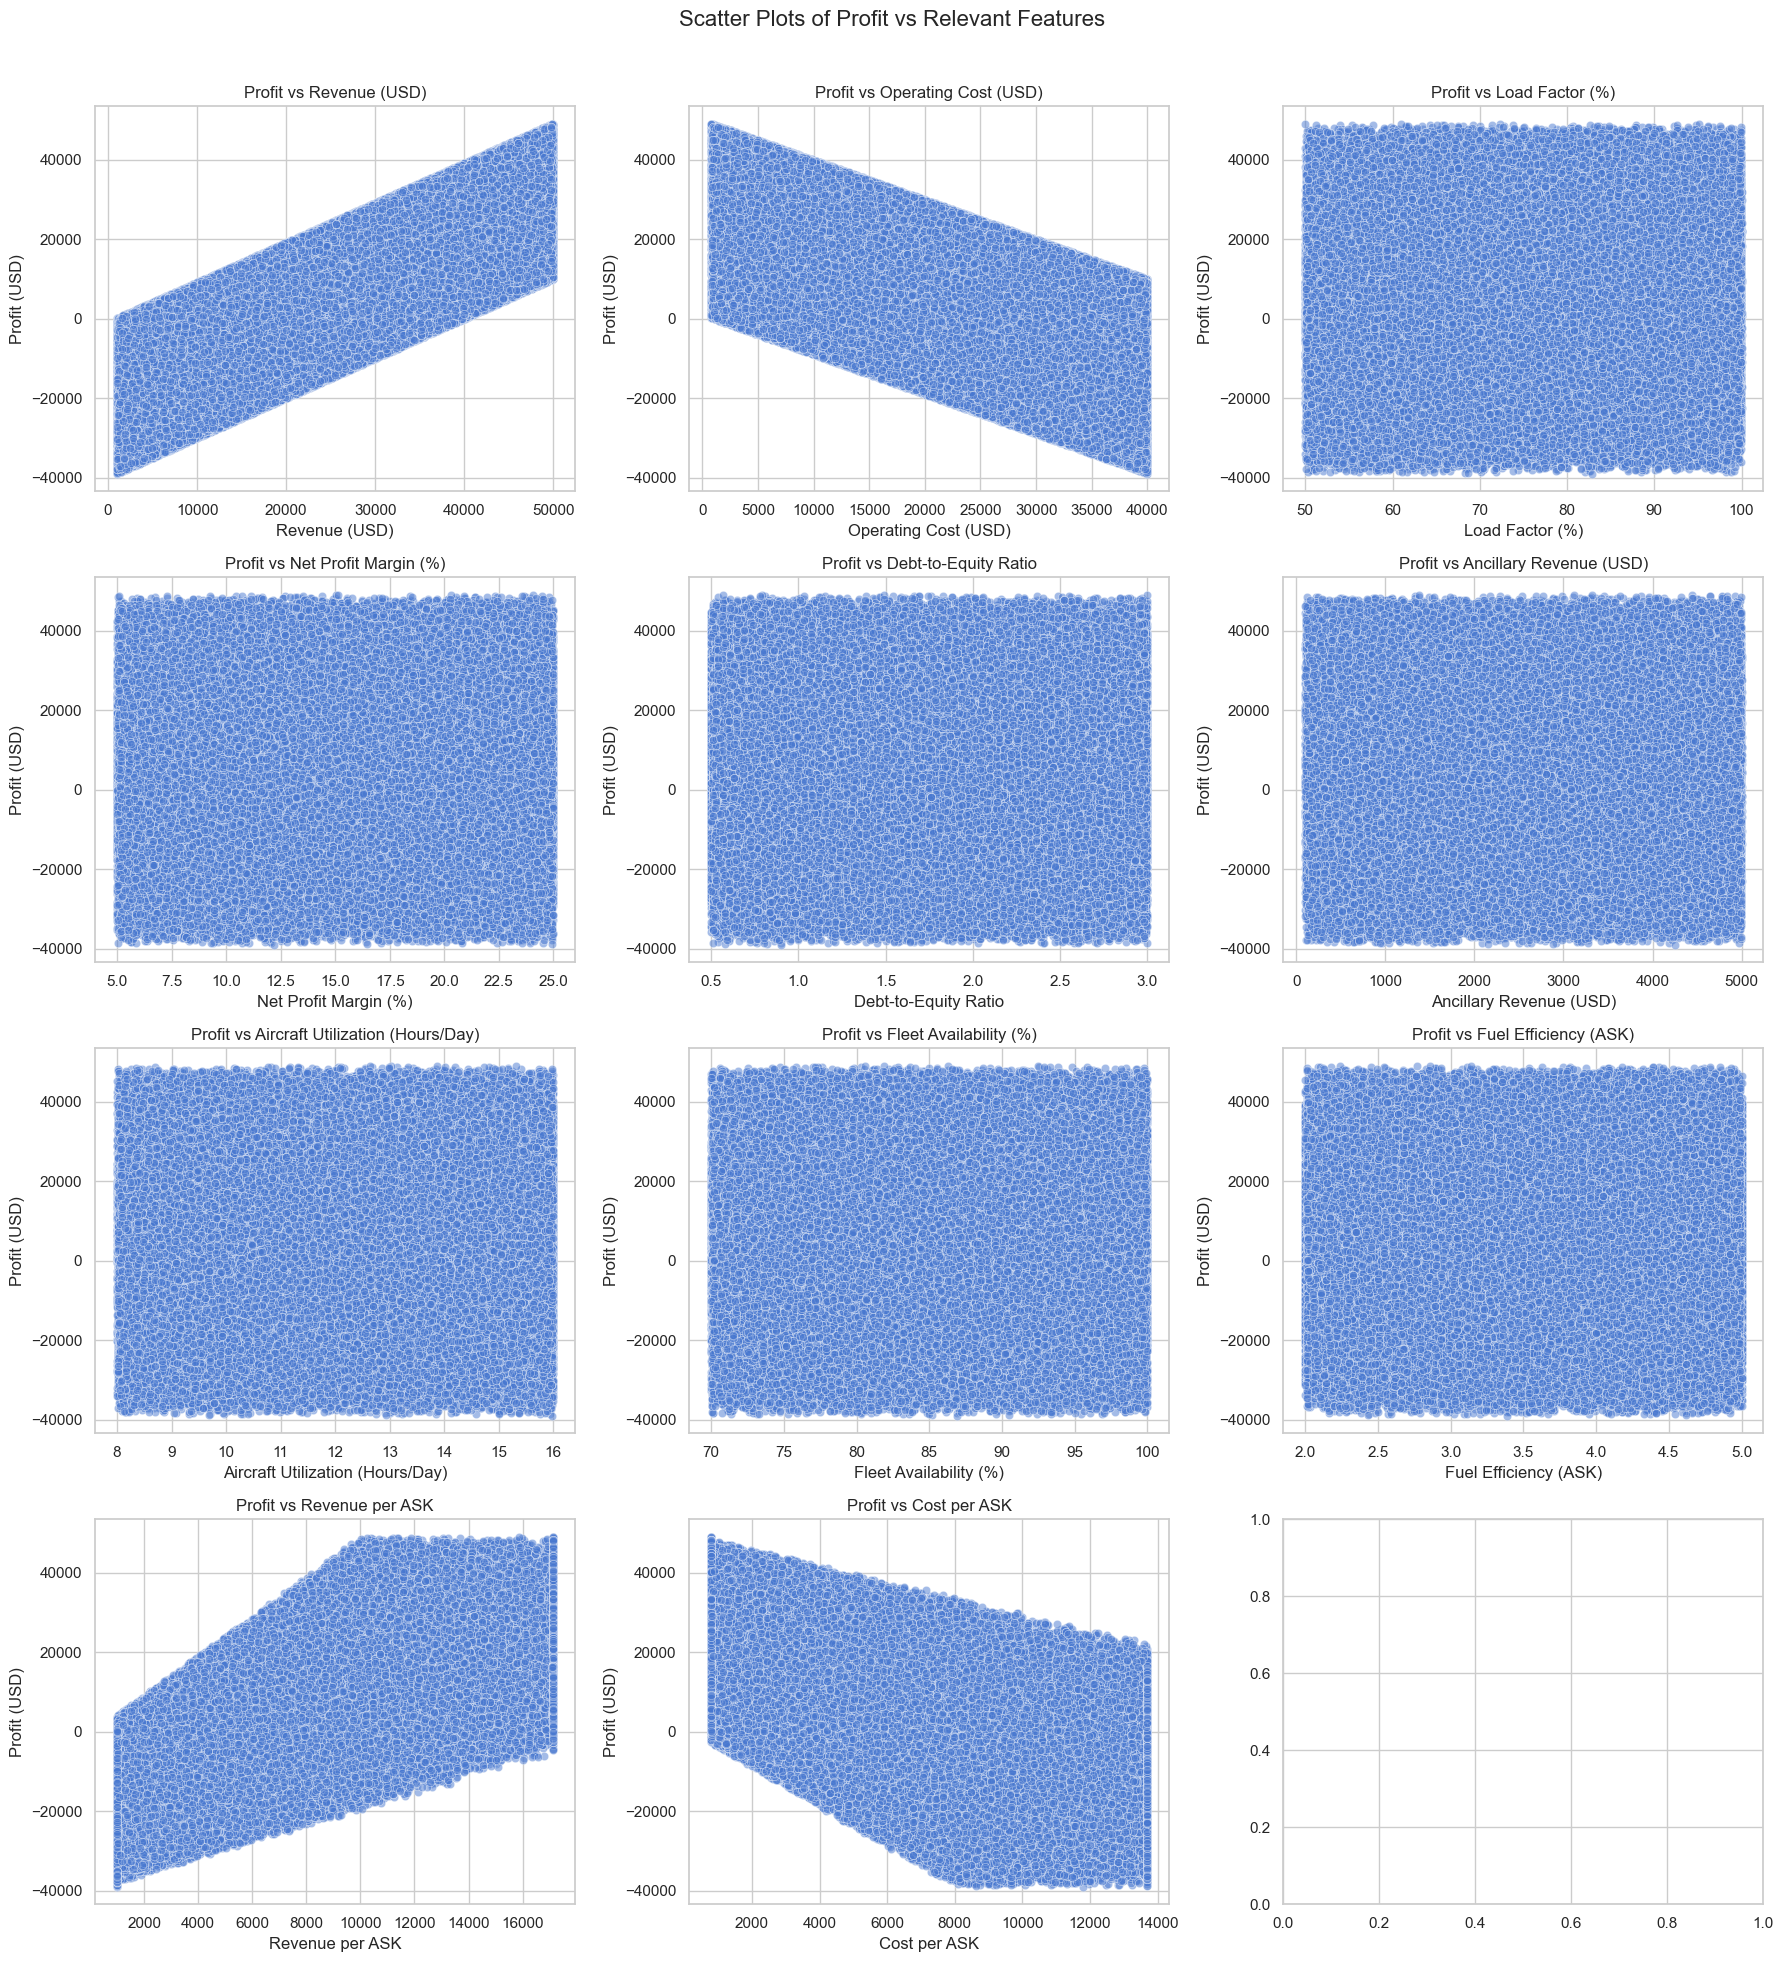

In [44]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Scatter Plots of Profit vs Relevant Features', fontsize=16)

for i, col in enumerate(relevant_columns):
    row, col_idx = divmod(i, 3)
    sns.scatterplot(x=df[col], y=df['Profit (USD)'], ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'Profit vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

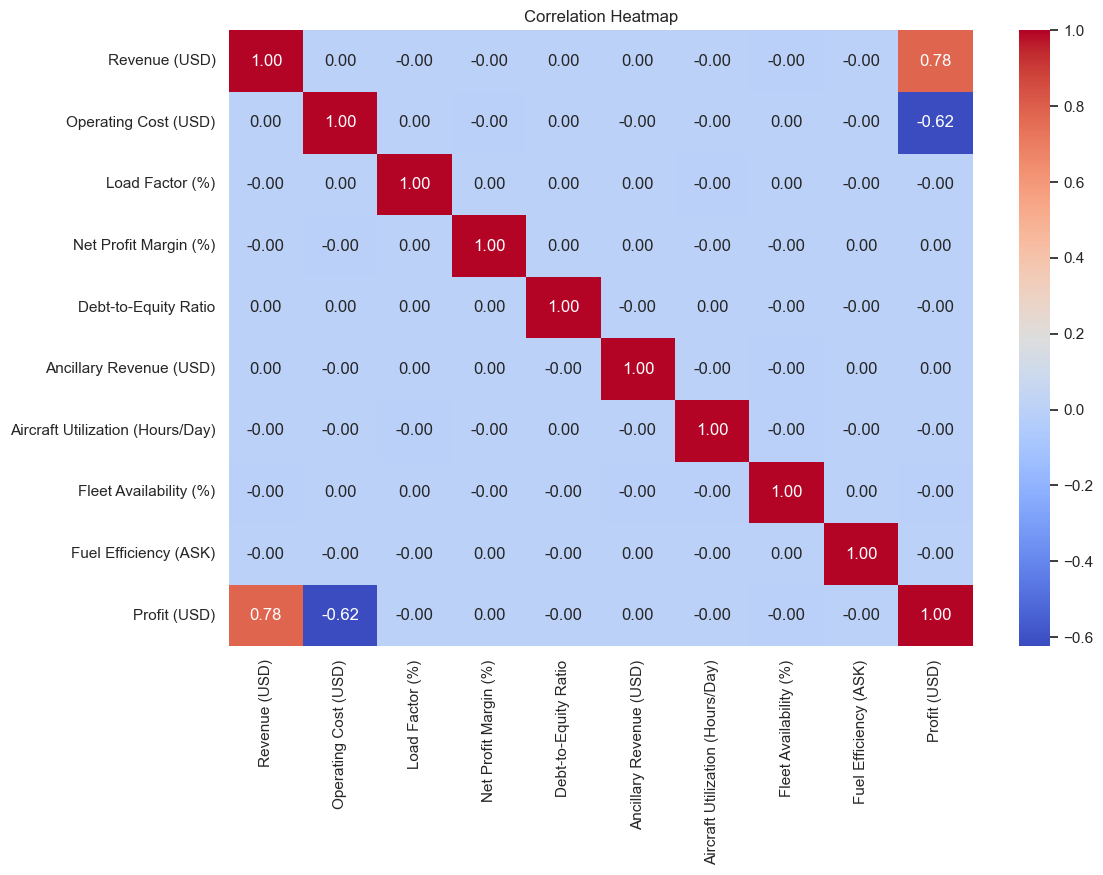

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[relevant_columns + ['Profit (USD)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

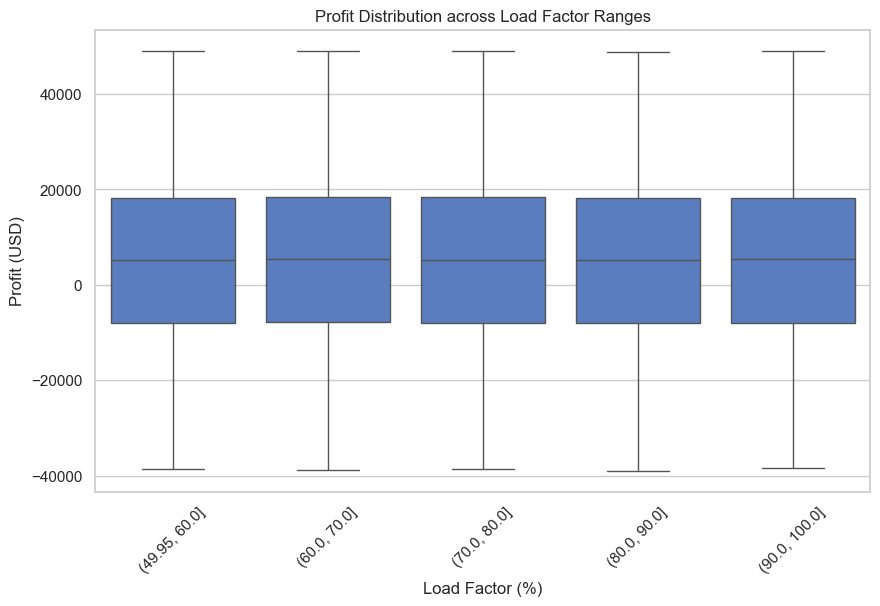

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Load Factor (%)'], bins=5), y=df['Profit (USD)'])
plt.title('Profit Distribution across Load Factor Ranges')
plt.xticks(rotation=45)
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_13020\2891399990.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Aircraft Utilization (Hours/Day)', y='Profit (USD)', data=df, ci=None)


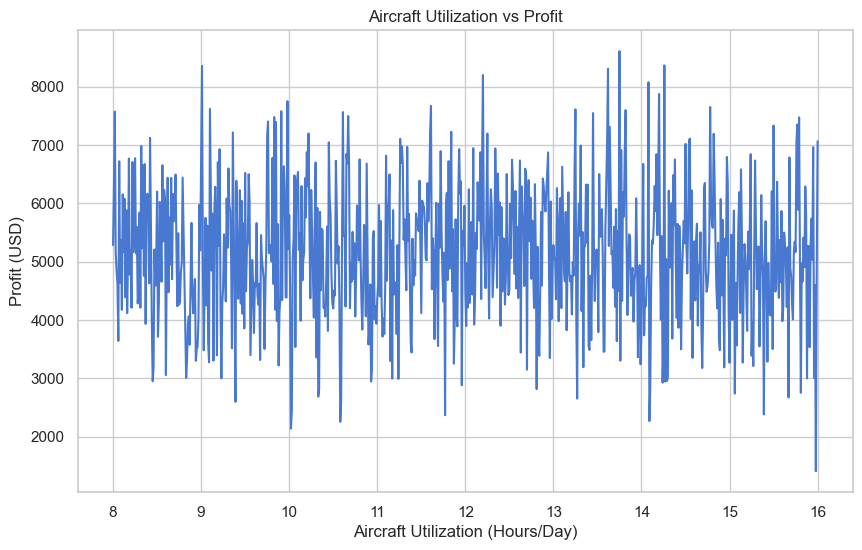

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Aircraft Utilization (Hours/Day)', y='Profit (USD)', data=df, ci=None)
plt.title('Aircraft Utilization vs Profit')
plt.show()

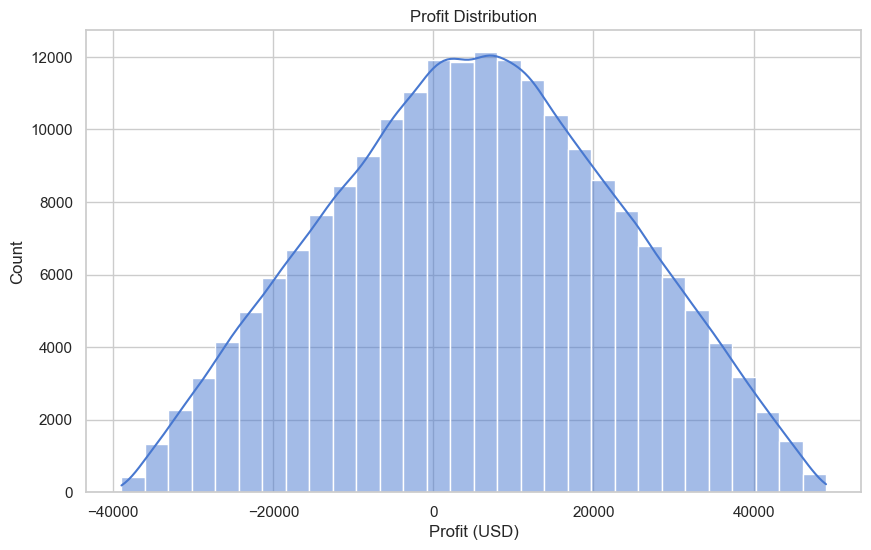

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit (USD)'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()

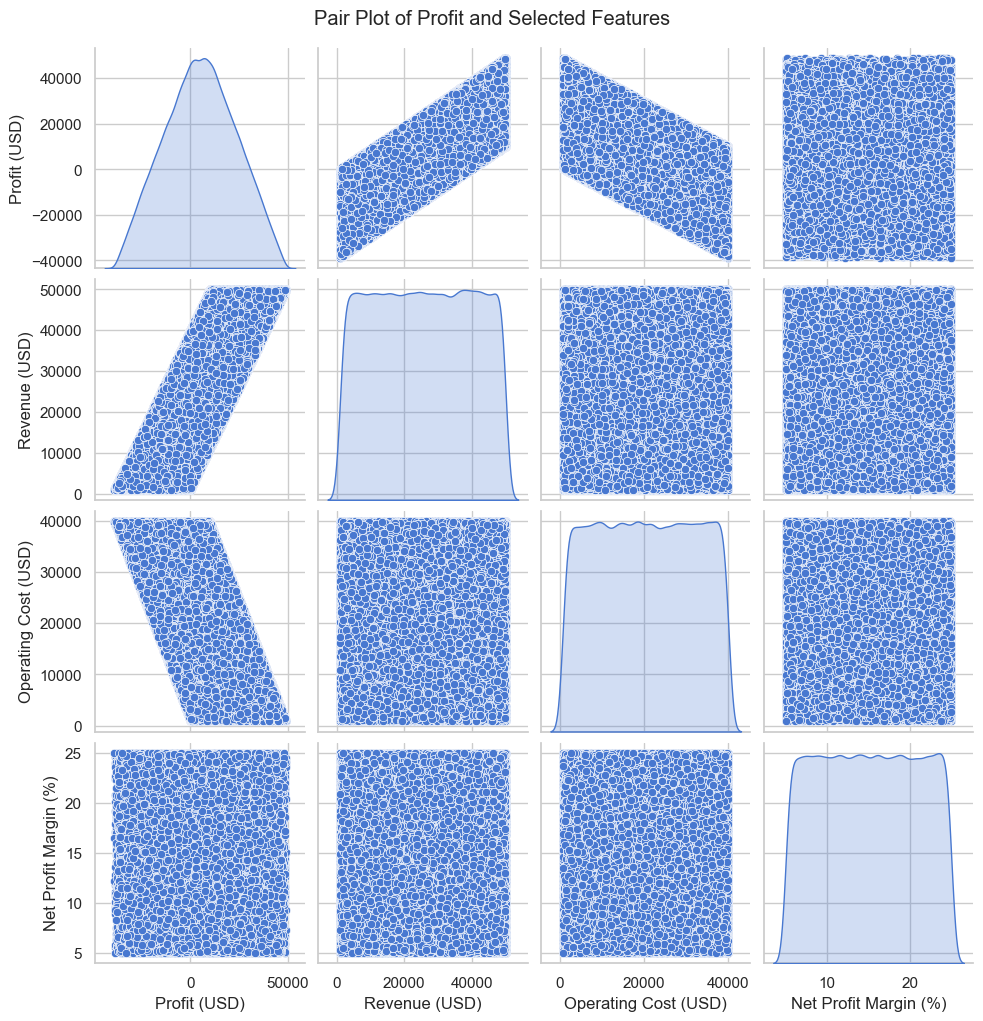

In [30]:
sns.pairplot(df[['Profit (USD)', 'Revenue (USD)', 'Operating Cost (USD)', 'Net Profit Margin (%)']], diag_kind='kde')
plt.suptitle('Pair Plot of Profit and Selected Features', y=1.02)
plt.show()